In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from datasets import load_data
from model import S6_Model_1,model_summary
import matplotlib.pyplot as plt


import sys
sys.path.append('S6/mnist/utils.py')
from util import test, train, plot_acc_loss
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


cpu


In [2]:
train_loader ,  test_loader  = load_data(batch_size=64)


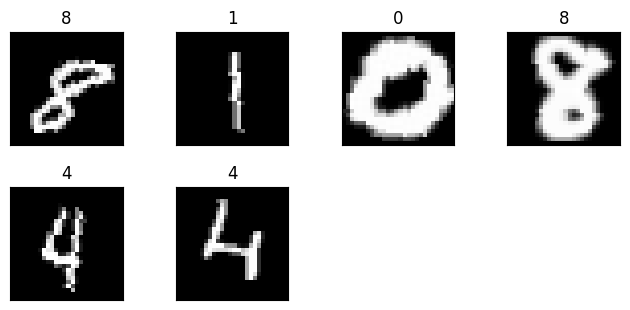

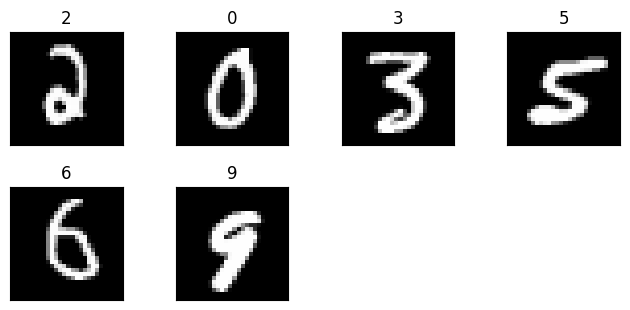

In [3]:
def plot_image(loader,no_images):
    batch_data, batch_label = next(iter(loader))
    _ = plt.figure()

    for i in range(no_images):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(batch_data[i].squeeze(0), cmap='gray')
        plt.title(batch_label[i].item())
        plt.xticks([])
        plt.yticks([])


plot_image(train_loader,6)
plot_image(test_loader,6)

In [4]:
model = S6_Model_1()
model_summary(model,input_size= (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           6,272
       BatchNorm2d-2          [-1, 128, 28, 28]             256
              ReLU-3          [-1, 128, 28, 28]               0
         MaxPool2d-4          [-1, 128, 14, 14]               0
            Conv2d-5            [-1, 8, 14, 14]           9,224
       BatchNorm2d-6            [-1, 8, 14, 14]              16
              ReLU-7            [-1, 8, 14, 14]               0
            Conv2d-8            [-1, 4, 14, 14]             292
       BatchNorm2d-9            [-1, 4, 14, 14]               8
             ReLU-10            [-1, 4, 14, 14]               0
        MaxPool2d-11              [-1, 4, 7, 7]               0
           Conv2d-12              [-1, 4, 7, 7]             148
      BatchNorm2d-13              [-1, 4, 7, 7]               8
             ReLU-14              [-1, 

In [5]:
model = S6_Model_1().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20




for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.4088 Batch_id=937 Accuracy=92.40: 100%|██████████| 938/938 [01:21<00:00, 11.51it/s]


Test set: Average loss: 0.0022, Accuracy: 9577/10000 (95.77%)

Epoch 2


Train: Loss=0.1064 Batch_id=937 Accuracy=96.39: 100%|██████████| 938/938 [01:17<00:00, 12.14it/s]


Test set: Average loss: 0.0013, Accuracy: 9729/10000 (97.29%)

Epoch 3


Train: Loss=0.3844 Batch_id=937 Accuracy=96.89: 100%|██████████| 938/938 [01:22<00:00, 11.35it/s]


Test set: Average loss: 0.0013, Accuracy: 9760/10000 (97.60%)

Epoch 4


Train: Loss=0.2176 Batch_id=937 Accuracy=97.44: 100%|██████████| 938/938 [01:19<00:00, 11.86it/s]


Test set: Average loss: 0.0006, Accuracy: 9871/10000 (98.71%)

Epoch 5


Train: Loss=0.0302 Batch_id=937 Accuracy=97.52: 100%|██████████| 938/938 [01:16<00:00, 12.27it/s]


Test set: Average loss: 0.0007, Accuracy: 9850/10000 (98.50%)

Epoch 6


Train: Loss=0.1624 Batch_id=937 Accuracy=97.70: 100%|██████████| 938/938 [01:15<00:00, 12.35it/s]


Test set: Average loss: 0.0007, Accuracy: 9867/10000 (98.67%)

Epoch 7


Train: Loss=0.0503 Batch_id=937 Accuracy=97.82: 100%|██████████| 938/938 [01:17<00:00, 12.15it/s]


Test set: Average loss: 0.0007, Accuracy: 9862/10000 (98.62%)

Epoch 8


Train: Loss=0.0143 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [01:12<00:00, 12.87it/s]


Test set: Average loss: 0.0005, Accuracy: 9895/10000 (98.95%)

Epoch 9


Train: Loss=0.1794 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [01:12<00:00, 12.95it/s]


Test set: Average loss: 0.0006, Accuracy: 9872/10000 (98.72%)

Epoch 10


Train: Loss=0.1084 Batch_id=937 Accuracy=97.98: 100%|██████████| 938/938 [01:11<00:00, 13.09it/s]


Test set: Average loss: 0.0005, Accuracy: 9901/10000 (99.01%)

Epoch 11


Train: Loss=0.0394 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [01:11<00:00, 13.14it/s]


Test set: Average loss: 0.0007, Accuracy: 9868/10000 (98.68%)

Epoch 12


Train: Loss=0.0778 Batch_id=937 Accuracy=98.23: 100%|██████████| 938/938 [01:13<00:00, 12.78it/s]


Test set: Average loss: 0.0006, Accuracy: 9880/10000 (98.80%)

Epoch 13


Train: Loss=0.0018 Batch_id=937 Accuracy=98.15: 100%|██████████| 938/938 [01:14<00:00, 12.53it/s]


Test set: Average loss: 0.0005, Accuracy: 9903/10000 (99.03%)

Epoch 14


Train: Loss=0.0312 Batch_id=937 Accuracy=98.32: 100%|██████████| 938/938 [01:11<00:00, 13.05it/s]


Test set: Average loss: 0.0005, Accuracy: 9890/10000 (98.90%)

Epoch 15


Train: Loss=0.0048 Batch_id=937 Accuracy=98.33: 100%|██████████| 938/938 [01:11<00:00, 13.15it/s]


Test set: Average loss: 0.0005, Accuracy: 9894/10000 (98.94%)

Epoch 16


Train: Loss=0.0084 Batch_id=937 Accuracy=98.81: 100%|██████████| 938/938 [01:12<00:00, 12.91it/s]


Test set: Average loss: 0.0003, Accuracy: 9931/10000 (99.31%)

Epoch 17


Train: Loss=0.0048 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [01:12<00:00, 13.00it/s]


Test set: Average loss: 0.0003, Accuracy: 9941/10000 (99.41%)

Epoch 18


Train: Loss=0.0016 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [01:13<00:00, 12.74it/s]


Test set: Average loss: 0.0003, Accuracy: 9935/10000 (99.35%)

Epoch 19


Train: Loss=0.1138 Batch_id=937 Accuracy=98.98: 100%|██████████| 938/938 [01:12<00:00, 12.94it/s]


Test set: Average loss: 0.0003, Accuracy: 9937/10000 (99.37%)

Epoch 20


Train: Loss=0.0044 Batch_id=937 Accuracy=99.05: 100%|██████████| 938/938 [01:12<00:00, 12.87it/s]


Test set: Average loss: 0.0003, Accuracy: 9938/10000 (99.38%)



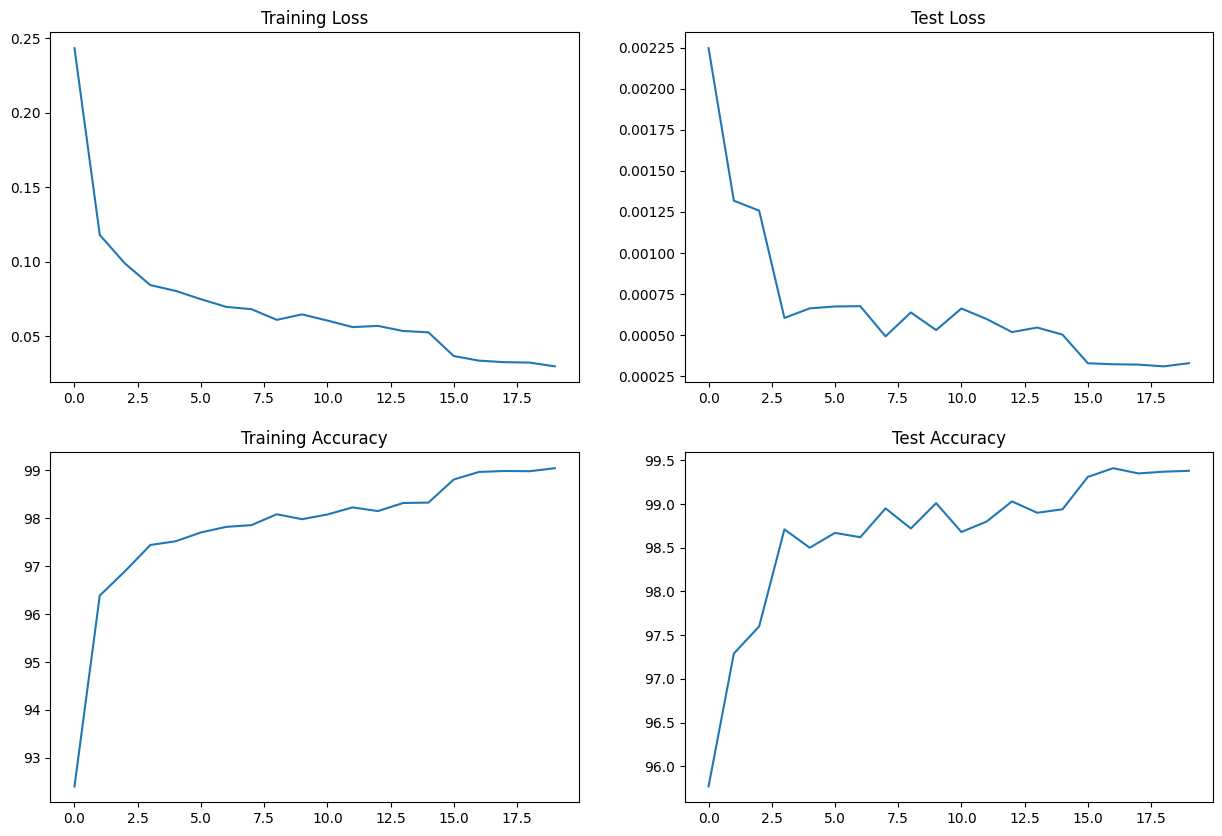

In [6]:
plot_acc_loss()